In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv("TP2 ex2data1.txt", header=None)


In [56]:
X = data.values[:, :-1]
y = data.values[:, -1]

In [57]:
pos, neg = (y==1).reshape(100, 1), (y==0).reshape(100, 1)

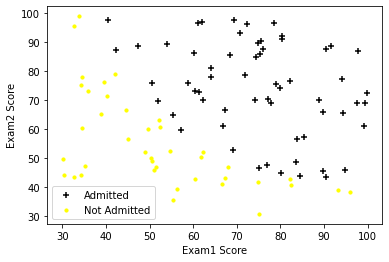

In [58]:
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c='black', marker='+', label="Admitted")
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1],c='yellow', marker='o', label="Not Admitted", s=10)
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 Score")
plt.legend(loc=0)

In [59]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [60]:
print(sigmoid(0))


0.5


In [61]:
def Cout(X, y, theta):
    m=len(y)
    
    h_theta = sigmoid(X@theta)
    y_pos = -y.T @ np.log(h_theta) 
    y_neg = (1-y).T @ np.log(1-h_theta)
    e = y_pos - y_neg
    
    cost = 1/m * sum(e)
    grad = 1/m * (X.T@(h_theta - y))
    
    return cost[0] , grad

In [62]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_Norm = (X - mu)/sigma
    return X_Norm, mu, sigma

In [63]:
m, n = X.shape
X, mu, sigma = featureNormalization(X)
X = np.column_stack((np.ones((m, 1)), X))
y = y.reshape(m, 1)
initial_theta = np.zeros((n+1, 1))
cost, grad= Cout(X, y, initial_theta)
print("Le coût du thêta initial est", cost)
print("Gradient au thêta initial (zéros) :", grad)

Le coût du thêta initial est 0.6931471805599452
Gradient au thêta initial (zéros) : [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [64]:
def gradientDescent(X, y, theta, alpha, n_iters):
    m=len(y)
    J_history =[]
    
    for i in range(n_iters):
        cost, grad = Cout(X, y, theta)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta, J_history

In [65]:
theta, J_history = gradientDescent(X=X, y=y, theta=initial_theta, alpha=0.01, n_iters=30000)
print(J_history[29999])

0.20386641236318892


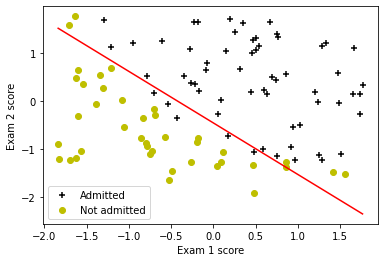

In [66]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="black",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="y",marker="o",label="Not admitted")
x_value = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value = -(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [67]:
x_sample = np.array([45, 85])
x_sample = featureNormalization(x_sample)[0]
x_sample = np.append(np.ones(1), x_sample)
prob = sigmoid(x_sample.dot(theta))
print("Pour un étudiant avec des scores de 45 et 85, nous prévoyons une probabilité d'admission de ",prob[0])

Pour un étudiant avec des scores de 45 et 85, nous prévoyons une probabilité d'admission de  0.7936994099590835
